In [ ]:
!pip install download

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

from datetime import datetime
import seaborn as sns
import os
import numpy as np
from download import download
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)


In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 6.76MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [ ]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Jun 28 19:19 ..
-rw-r--r-- 1 root root 2835916 Jun 28 19:19 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Jun 28 19:19 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Jun 28 19:19 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Jun 28 19:19 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Jun 28 19:19 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Jun 28 19:19 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Jun 28 19:19 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Jun 28 19:19 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Jun 28 19:19 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Jun 28 19:19 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Jun 28 19:19 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [ ]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)

In [ ]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [ ]:
print("Rows : ",aq_df.shape[0])
print("Columns : ",aq_df.shape[1])
print("\nFeatures : \n",aq_df.columns.tolist())
print("\nMissing values : \n",aq_df.isnull().any())
print("\nUnique values : \n",aq_df.nunique())

Rows :  35064
Columns :  19

Features : 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values : 
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values : 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5               

In [ ]:
aq_df.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [ ]:
aq_df.query('TEMP != TEMP')

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,2015-01-27 20:00:00,16749,2015,1,27,20,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16813,2015-01-30 13:00:00,16814,2015,1,30,13,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16829,2015-01-31 05:00:00,16830,2015,1,31,5,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16873,2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16883,2015-02-02 11:00:00,16884,2015,2,2,11,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16930,2015-02-04 10:00:00,16931,2015,2,4,10,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16933,2015-02-04 13:00:00,16934,2015,2,4,13,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17007,2015-02-07 15:00:00,17008,2015,2,7,15,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17030,2015-02-08 14:00:00,17031,2015,2,8,14,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17052,2015-02-09 12:00:00,17053,2015,2,9,12,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [ ]:
aq_df.query('TEMP != TEMP').count()

year_month_day_hour    53
No                     53
year                   53
month                  53
day                    53
hour                   53
PM2.5                  53
PM10                   53
SO2                    53
NO2                    53
CO                     53
O3                     53
TEMP                    0
PRES                    3
DEWP                    0
RAIN                    3
wd                     10
WSPM                   10
station                53
dtype: int64

In [ ]:
aq_df[aq_df['PM2.5'].isnull()]

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
752,2013-04-01 08:00:00,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,2013-04-01 09:00:00,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,2013-04-01 10:00:00,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
755,2013-04-01 11:00:00,756,2013,4,1,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
756,2013-04-01 12:00:00,757,2013,4,1,12,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,2017-02-20 15:00:00,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,2017-02-20 16:00:00,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,2017-02-20 18:00:00,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,2017-02-21 11:00:00,34884,2017,2,21,11,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


In [ ]:
import plotly.express as px

fig = px.line(aq_df, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
  rangeslider_visible=True,
  rangeselector=dict(
    buttons=list([
      dict(count=1, label="1y", step="year", stepmode="backward"),
      dict(count=2, label="2y", step="year", stepmode="backward"),
      dict(count=3, label="3y", step="year", stepmode="backward"),
      dict(step="all")
    ])
  )
)
fig.show()


In [ ]:
fig = px.line(aq_df, x='year_month_day_hour', y='TEMP', title='TEMP with Slider')

fig.update_xaxes(
  rangeslider_visible=True,
  rangeselector=dict(
    buttons=list([
      dict(count=1, label="1y", step="year", stepmode="backward"),
      dict(count=2, label="2y", step="year", stepmode="backward"),
      dict(count=3, label="3y", step="year", stepmode="backward"),
      dict(step="all")
    ])
  )
)
fig.show()

In [ ]:
aq_df = aq_df.set_index('year_month_day_hour')

In [ ]:
aq_df.loc['2015-02-02':'2015-02-04']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-02 00:00:00,16873,2015,2,2,0,67.0,67.0,32.0,40.0,2600.0,11.0,-4.0,1025.0,-19.5,0.0,NW,1.3,Dingling
2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 02:00:00,16875,2015,2,2,2,65.0,65.0,17.0,46.0,2600.0,3.0,-6.0,1023.0,-19.7,0.0,NNW,0.1,Dingling
2015-02-02 03:00:00,16876,2015,2,2,3,75.0,75.0,18.0,50.0,2900.0,3.0,-6.0,1023.0,-19.4,0.0,NNW,2.3,Dingling
2015-02-02 04:00:00,16877,2015,2,2,4,96.0,96.0,19.0,53.0,3600.0,2.0,-6.0,1023.0,-19.0,0.0,NW,1.5,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 19:00:00,16940,2015,2,4,19,4.0,20.0,2.0,2.0,200.0,88.0,3.0,1023.0,-15.2,0.0,NNW,4.0,Dingling
2015-02-04 20:00:00,16941,2015,2,4,20,5.0,12.0,3.0,2.0,200.0,87.0,2.0,1026.0,-15.5,0.0,NNW,3.5,Dingling
2015-02-04 21:00:00,16942,2015,2,4,21,5.0,7.0,3.0,2.0,200.0,84.0,2.0,1022.0,-14.6,0.0,N,3.1,Dingling


In [ ]:
aq_df_na = aq_df.copy()

In [ ]:
aq_df_na = aq_df_na.dropna()

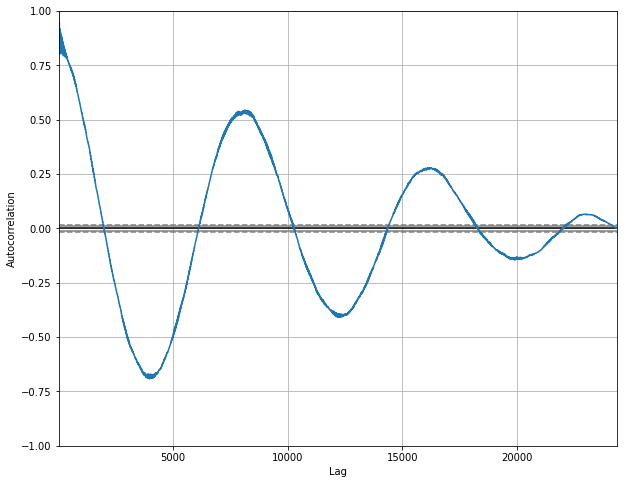

In [ ]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

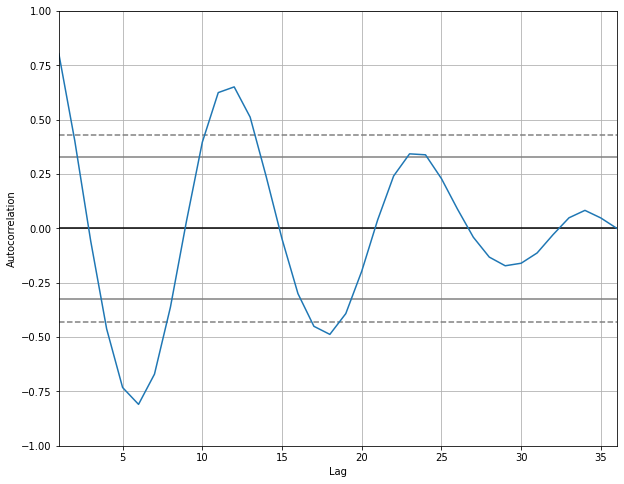

In [ ]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample("1m").mean())

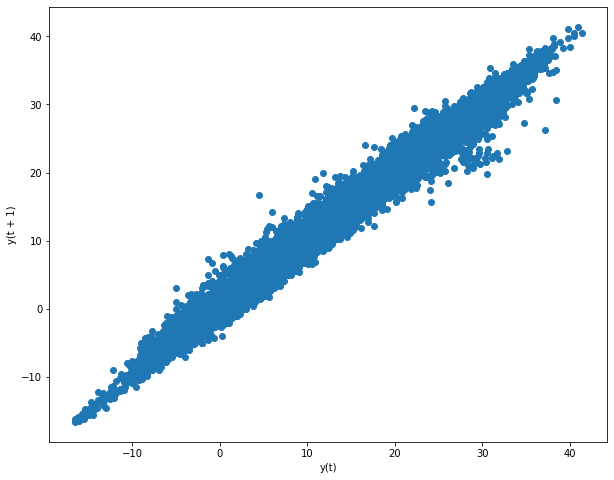

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)

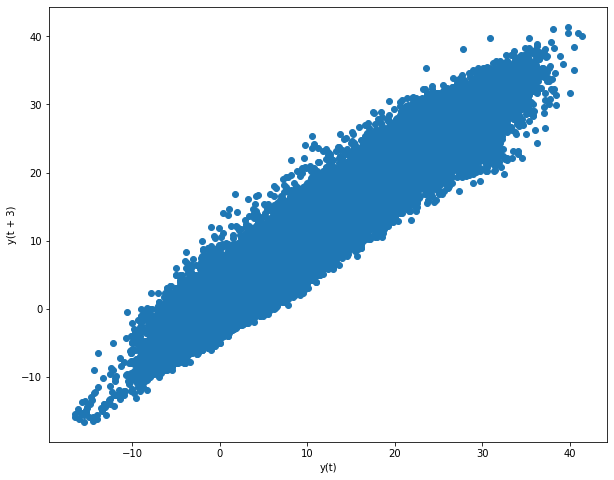

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=3)

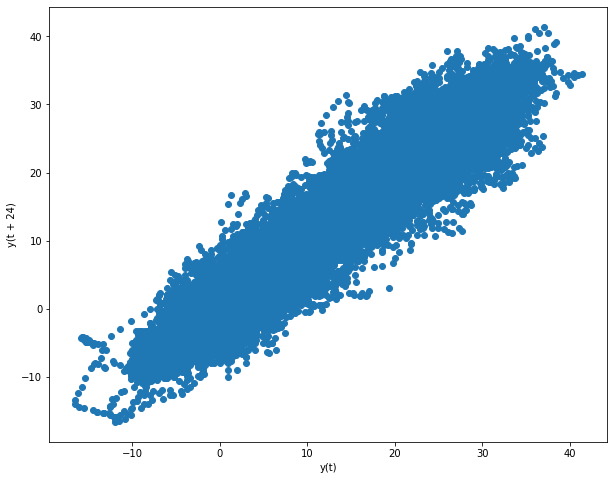

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)

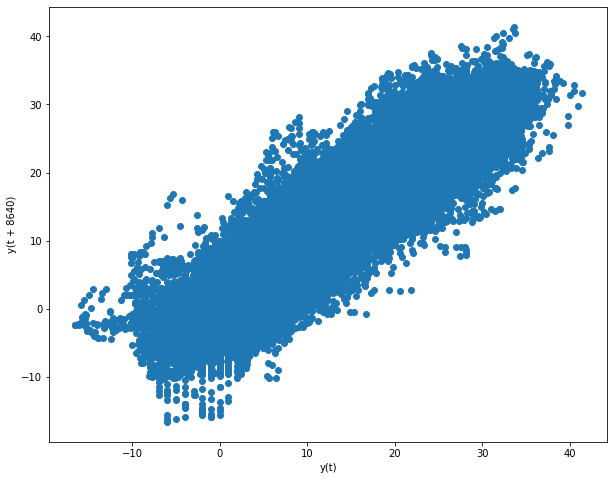

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)

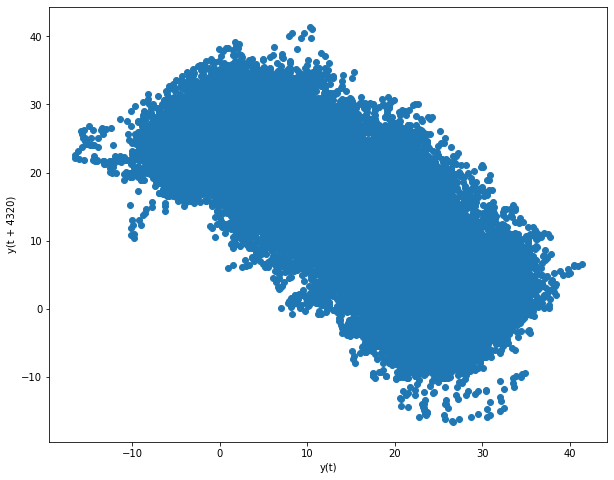

In [ ]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)

In [ ]:
aq_df['2015-02-21 10':'2015-02-21 20']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,2015,2,21,10,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,2015,2,21,11,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,2015,2,21,12,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,2015,2,21,13,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,2015,2,21,14,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,2015,2,21,15,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,2015,2,21,16,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,2015,2,21,17,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,2015,2,21,18,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


In [ ]:
aq_df_imp = aq_df['2015-02-21 10':'2015-02-21 23'][['TEMP']]

In [ ]:
aq_df_imp

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


In [ ]:
aq_df_imp['TEMP_FFILL'] = aq_df_imp['TEMP'].fillna(method='ffill')

In [ ]:
aq_df_imp

,TEMP,TEMP_FFILL
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [ ]:
aq_df_imp['TEMP_BFILL'] = aq_df_imp['TEMP'].fillna(method='bfill')

In [ ]:
aq_df_imp

,TEMP,TEMP_FFILL,TEMP_BFILL
year_month_day_hour,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


In [ ]:
aq_df_imp[['TEMP']].rolling(window=2,min_periods=1).mean()

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,1.0
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,2.0
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.5
2015-02-21 18:00:00,2.5


In [ ]:
aq_df_imp[['TEMP_ROLLING']] = aq_df_imp[['TEMP']].rolling(window=2,min_periods=1).mean()

In [ ]:
aq_df_imp

,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING
year_month_day_hour,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.5
2015-02-21 18:00:00,2.0,2.0,2.0,2.5


In [ ]:
aq_df.loc[aq_df_imp.index + pd.offsets.DateOffset(years = -1)][['TEMP']]

,TEMP
year_month_day_hour,
2014-02-21 10:00:00,1.4
2014-02-21 11:00:00,2.4
2014-02-21 12:00:00,3.0
2014-02-21 13:00:00,3.8
2014-02-21 14:00:00,3.5
2014-02-21 15:00:00,3.6
2014-02-21 16:00:00,3.3
2014-02-21 17:00:00,2.8
2014-02-21 18:00:00,1.3


In [ ]:
aq_df_imp = aq_df_imp.reset_index()

In [ ]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5


In [ ]:
aq_df_imp['TEMP-PREVY'] = aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years = -1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'],axis=1)

In [ ]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING,TEMP-PREVY
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5,1.0
